### One-way ANOVA (independent samples)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import seaborn as sns

#### Data parameters

In [12]:
# group meand
mean1 = 8
mean2 = 6.8
mean3 = 6

# sample per group
N1 = 30
N2 = 35
N3 = 31

# standard deviation
std1 = 2.2
std2 = 1.4
std3 = 2

In [13]:
# simulate the data
data1 = mean1 + np.random.randn(N1)*std1
data2 = mean2 + np.random.randn(N2)*std2
data3 = mean3 + np.random.randn(N3)*std3

datacolumn = np.hstack((data1, data2, data3))

In [14]:
# group labels 
groups = ['1']*N1 + ['2']*N2 + ['3']*N3

In [15]:
# convert to a pandas dataframe
df = pd.DataFrame({'Data': datacolumn, 'Group': groups})

In [16]:
df.sample(3)

,Data,Group
42,6.439312,2
50,9.294395,2
74,7.772028,3


In [17]:
pg.anova(data=df, dv='Data', between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,93,1.548707,0.217953,0.032232


In [18]:
pg.pairwise_tukey(data=df, dv='Data', between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,7.250129,6.932933,0.317197,0.428505,0.740241,0.721385,0.181976
1,1,3,7.250129,6.479104,0.771025,0.441080,1.748041,0.193168,0.441972
2,2,3,6.932933,6.479104,0.453828,0.424767,1.068418,0.534498,0.260411


<AxesSubplot:title={'center':'Data'}, xlabel='Group'>

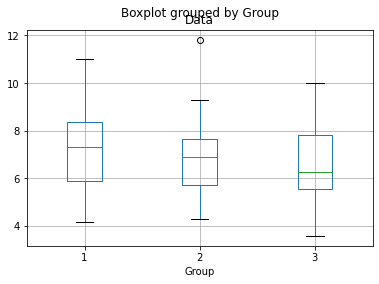

In [19]:
df.boxplot('Data', by='Group')

### Two-way mixed-effects ANOVA

#### Data and group labels

In [25]:
data = np.loadtxt(open('TwoWayMixedANOVA_data.csv'), delimiter=',')

In [26]:
timepoint = ['1']*45 + ['2']*45 +['3']*45
groups = ['1']*15 + ['2']*15 +['3']*15
s = []
for i in range(45):
    s +=[str(i)]

In [28]:
# convert to pandas
df = pd.DataFrame(data=np.matrix.flatten(data, 'F'), columns=['Data'])
df['Group'] = np.tile(groups, 3)
df['Time_point'] = timepoint
df['Subject'] = np.tile(s, 3)

pd.set_option('display.max_rows', None, 'display.max_columns', None)
df.sample(5)

,Data,Group,Time_point,Subject
94,16.0,1,3,4
112,17.0,2,3,22
9,17.0,1,1,9
57,18.0,1,2,12
109,13.0,2,3,19


In [29]:
pg.mixed_anova(data=df, dv='Data', between='Group', within='Time_point', subject='Subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,40.311111,2,42,20.155556,2.446942,9.880857e-02,0.104361,NaN
1,Time_point,69.644444,2,84,34.822222,31.147184,7.588754e-11,0.425815,0.901879
2,Interaction,57.777778,4,84,14.444444,12.920019,3.051011e-08,0.380897,NaN


<AxesSubplot:xlabel='Time_point', ylabel='Data'>

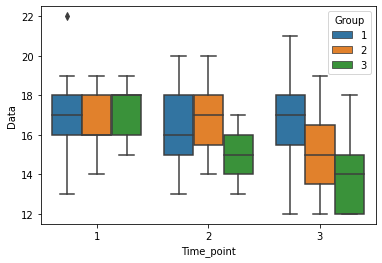

In [30]:
sns.boxplot(data=df, hue='Group', y='Data', x='Time_point')